In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("churn_modelling.csv")

In [3]:
# 3️⃣ Drop unnecessary columns
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# 4️⃣ Encode categorical data
ds["Gender"] = ds["Gender"].map({"Male": 0, "Female": 1})
ds = pd.get_dummies(ds, columns=["Geography"], drop_first=True)

# 5️⃣ Split into features and target
X = ds.drop("Exited", axis=1)
y = ds["Exited"]

# 6️⃣ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7️⃣ Normalize (scale) the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    early_stopping=True,
                    random_state=42)

# 9️⃣ Train the model
clf.fit(X_train, y_train)

# 🔟 Make predictions
y_pred = clf.predict(X_test)

In [11]:
# 11️⃣ Evaluate model performance
acc = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(acc * 100, 2), "%")


✅ Model Accuracy: 86.33 %


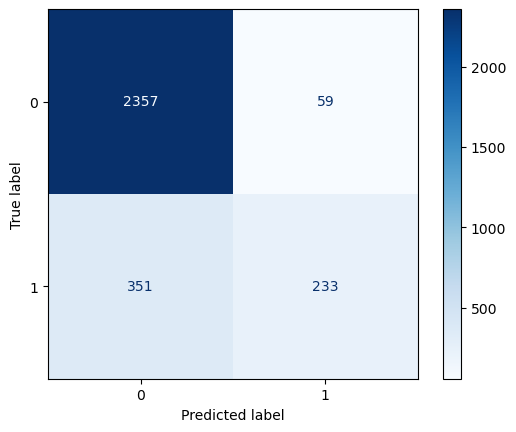

In [8]:
# 12️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.show()